# Kernel PCA

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [3]:
import matplotlib.pyplot as plt

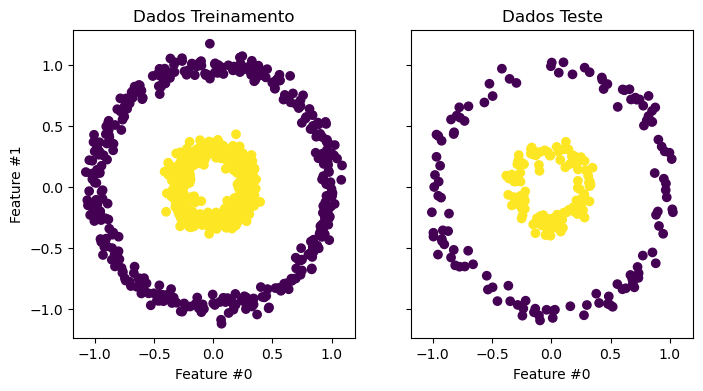

In [5]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Dados Treinamento")
test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_=test_ax.set_title("Dados Teste")

In [6]:
from sklearn.decomposition import PCA, KernelPCA

In [8]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1 
)
X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

Text(0.5, 1.0, 'Projecao dos dados com Kernel PCA')

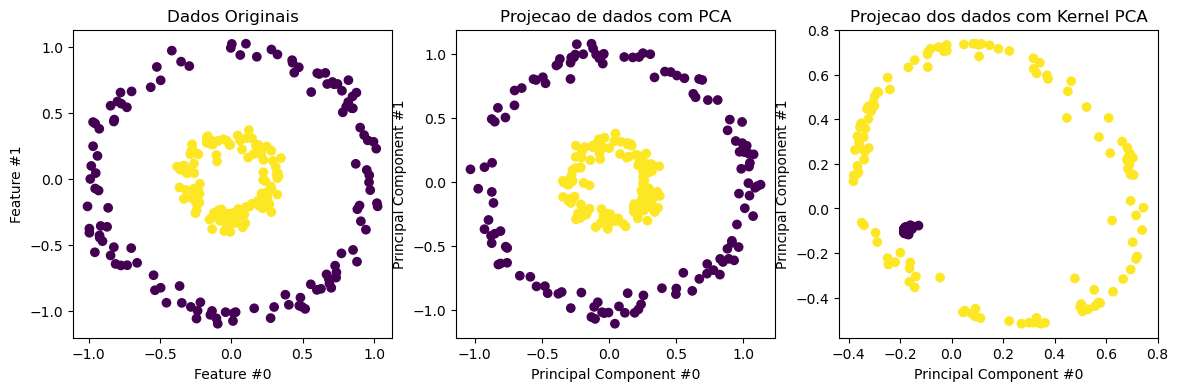

In [9]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(ncols=3, figsize=(14, 4))

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Dados Originais")
pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal Component #1")
pca_proj_ax.set_xlabel("Principal Component #0")
pca_proj_ax.set_title("Projecao de dados com PCA")
kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal Component #1")
kernel_pca_proj_ax.set_xlabel("Principal Component #0")
kernel_pca_proj_ax.set_title("Projecao dos dados com Kernel PCA")

# Tratamento de Imagem Kernel PCA

In [11]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
X,y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True)
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=1_000, test_size=100)

C:\Users\Nayan Couto\.conda\envs\POO\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [13]:
rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise
noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

In [14]:
import matplotlib.pyplot as plt

In [16]:
def plot_digits(X, title):
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, ax.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

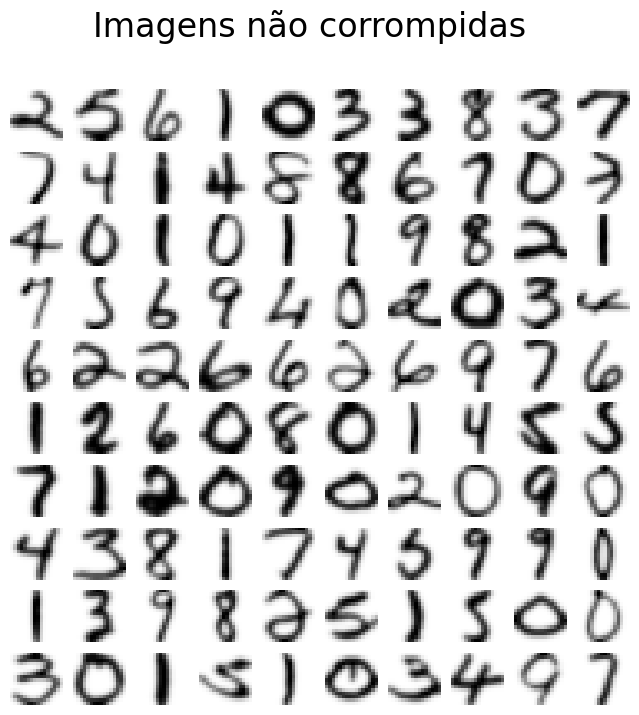

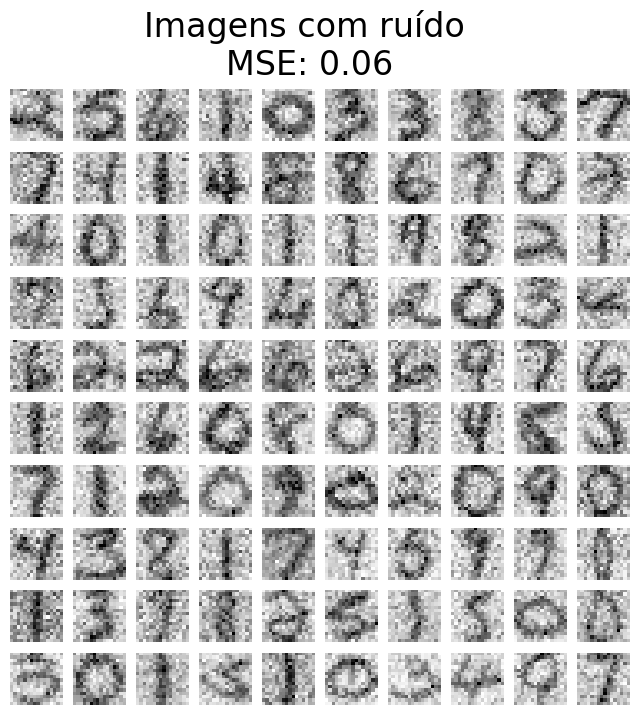

In [17]:
plot_digits(X_test, "Imagens não corrompidas")
plot_digits(X_test_noisy, f"Imagens com ruído \nMSE: {np.mean((X_test - X_test_noisy) ** 2):.2f}")

In [18]:
from sklearn.decomposition import KernelPCA

In [20]:
kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=1e-3, fit_inverse_transform=True, alpha=5e-3)
X_test_kernel_pca = kernel_pca.fit(X_train_noisy)
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test_noisy))

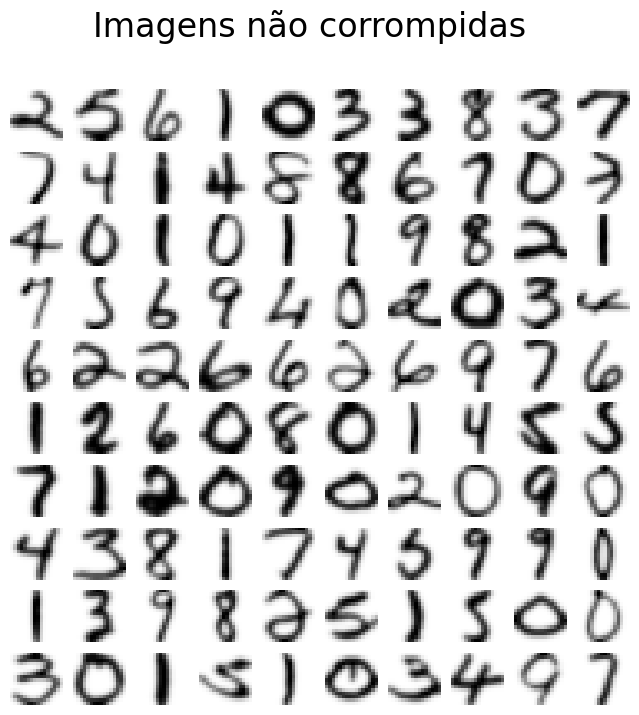

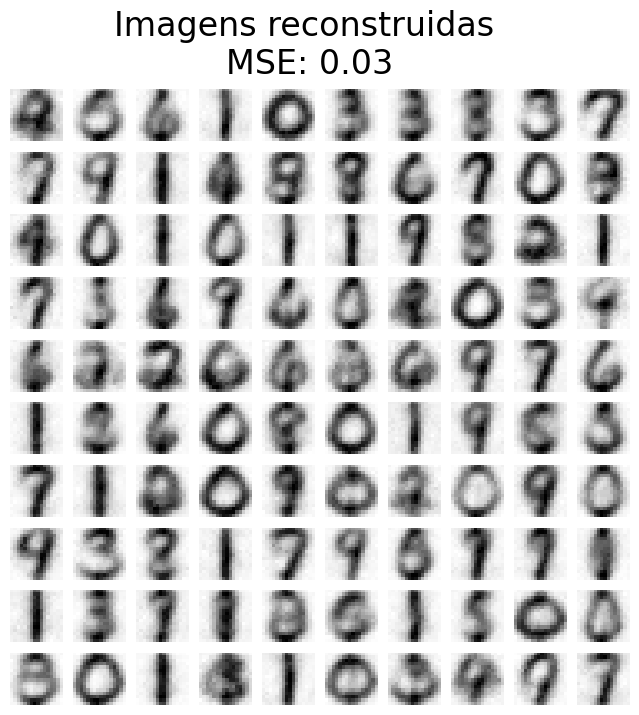

In [21]:
plot_digits(X_test, "Imagens não corrompidas")
plot_digits(X_reconstructed_kernel_pca, f"Imagens reconstruidas \nMSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}")

# Projeções aleatórias

In [24]:
import sys
from time import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.datasets import load_digits
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils.fixes import parse_version
if parse_version(matplotlib.__version__) >= parse_version("2.1"):
    density_param = {"density": True}
else:
    density_param = {"normed": True}

## Relembrando a teoria

In [25]:
"""
Equação 1
(1-eps) ||u-v||^2  <  ||p(u) - p(v)||^2 < (1+eps) ||u-v||^2

Equação 2
n_components >= 4log(n_samples) / (eps^2 /2 - eps^3 /3)
"""

'\nEquação 1\n(1-eps) ||u-v||^2  <  ||p(u) - p(v)||^2 < (1+eps) ||u-v||^2\n\nEquação 2\nn_components >= 4log(n_samples) / (eps^2 /2 - eps^3 /3)\n'

In [26]:
eps_range = np.linspace(0.01, 0.05, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))
n_samples_range = np.logspace(1, 9, 9)
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

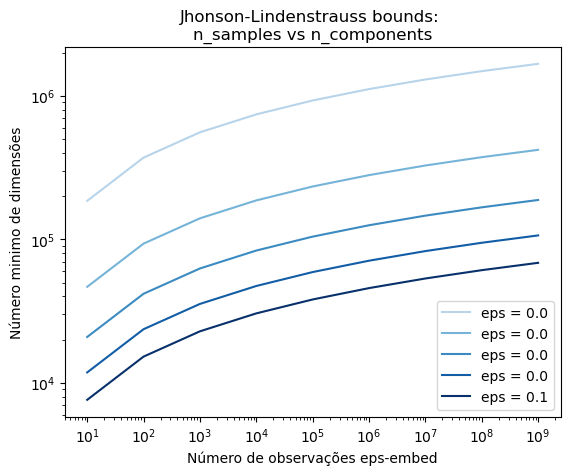

In [28]:
for eps, color in zip(eps_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(n_samples_range, eps=eps)
    plt.loglog(n_samples_range, min_n_components, color=color)
plt.legend(["eps = %0.1f" % eps for eps in eps_range], loc="lower right")
plt.xlabel("Número de observações eps-embed")
plt.ylabel("Número minimo de dimensões")
plt.title("Jhonson-Lindenstrauss bounds: \nn_samples vs n_components")
plt.show()

In [31]:
eps_range = np.linspace(0.01, 0.99, 100)
n_samples_range = np.logspace(2, 6, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(n_samples_range)))
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

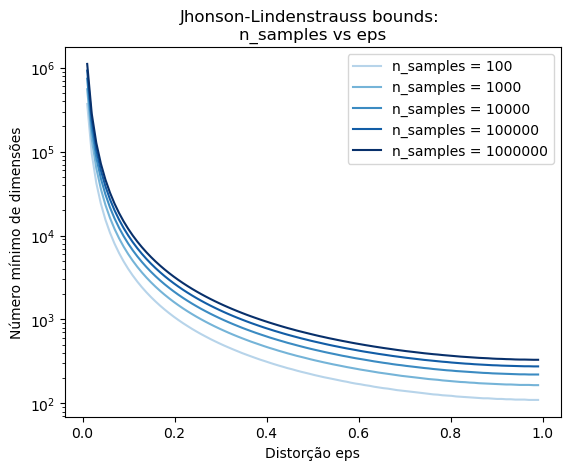

In [32]:
for n_samples, color in zip(n_samples_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(n_samples, eps=eps_range)
    plt.semilogy(eps_range, min_n_components, color=color)
plt.legend(["n_samples = %d" % n_samples for n_samples in n_samples_range], loc="upper right")
plt.xlabel("Distorção eps")
plt.ylabel("Número mínimo de dimensões")
plt.title("Jhonson-Lindenstrauss bounds: \nn_samples vs eps")
plt.show()